### Skip-gram에 의한 Word embedding 시험
- 이상한 나라의 엘리스 소설에 사용된 단어들을 2차원 벡터로 임베딩한다. (단어->onehot->단어2개(결과물,  x,y축)->one-hot->단어)
- Trigram을 이용하여 Skip-gram으로 단어를 임베딩한다.
- 2차원 벡터의 단어들을 2차원 공간상에 표시하고 단어들 간의 유사성을 육안으로 확인한다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk import pos_tag
from nltk.stem import PorterStemmer

#### 전처리 작업을 수행한다
1. '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' (string.punctuation) 문자를 공백 문자로 변경.
2. 모두 소문자로 변경
3. 불용어 제거 및 3글자 이하 단어 제거
4. PortterStemmer 적용
5. Lemmatizer 적용

In [2]:
def preprocessing(text):
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())
    tokens = nltk.word_tokenize(text2)
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens)    
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()

    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             

    return pre_proc_text

#### alice_in_wonderlant.txt를 읽는다

In [3]:
lines = []
fin = open("alice_in_wonderland.txt", "r")

for line in fin:
    if len(line) <= 1:
        continue
    lines.append(preprocessing(line))
fin.close()

In [4]:
lines[:10]

['alic adventur wonderland',
 'alic adventur wonderland',
 'lewi carrol',
 'millennium fulcrum edit',
 'chapter',
 'rabbit hole',
 'alic begin get tire sit sister',
 'bank noth twice',
 'peep book sister read',
 'pictur convers use book']

#### 가장 많이 쓰인 단어 순위를 dictionary로 만든다 단어 count가 아님.

In [5]:
import collections
counter = collections.Counter()

In [6]:
for line in lines:
    for word in nltk.word_tokenize(line):
        counter[word.lower()]+=1

In [7]:
counter.most_common(10)

[('say', 532),
 ('alic', 399),
 ('littl', 128),
 ('go', 123),
 ('think', 121),
 ('get', 112),
 ('look', 106),
 ('one', 105),
 ('know', 103),
 ('like', 97)]

In [8]:
word2idx = {w:(i+1) for i,(w,_) in enumerate(counter.most_common())}
idx2word = {v:k for k,v in word2idx.items()}

In [9]:
print(dict(list(word2idx.items())[0:20]))

{'say': 1, 'alic': 2, 'littl': 3, 'go': 4, 'think': 5, 'get': 6, 'look': 7, 'one': 8, 'know': 9, 'like': 10, 'come': 11, 'begin': 12, 'would': 13, 'see': 14, 'thing': 15, 'could': 16, 'time': 17, 'make': 18, 'queen': 19, 'king': 20}


In [10]:
print(dict(list(idx2word.items())[0:20]))

{1: 'say', 2: 'alic', 3: 'littl', 4: 'go', 5: 'think', 6: 'get', 7: 'look', 8: 'one', 9: 'know', 10: 'like', 11: 'come', 12: 'begin', 13: 'would', 14: 'see', 15: 'thing', 16: 'could', 17: 'time', 18: 'make', 19: 'queen', 20: 'king'}


#### Trigram으로 Skip-gram을 생성한다

In [11]:
xs = []
ys = []

line = 'pictur convers use book'

embedding = [word2idx[w.lower()] for w in nltk.word_tokenize(line)] 
triples = list(nltk.trigrams(embedding))
w_lefts = [x[0] for x in triples]
w_centers = [x[1] for x in triples]
w_rights = [x[2] for x in triples]
xs.extend(w_centers)
ys.extend(w_lefts)
xs.extend(w_centers)
ys.extend(w_rights)

In [12]:
embedding

[406, 238, 53, 186]

In [13]:
triples

[(406, 238, 53), (238, 53, 186)]

In [14]:
xs

[238, 53, 238, 53]

In [15]:
ys

[406, 238, 53, 186]

In [16]:
xs = []
ys = []

for line in lines:
    embedding = [word2idx[w.lower()] for w in nltk.word_tokenize(line)] 
    triples = list(nltk.trigrams(embedding))
    w_lefts = [x[0] for x in triples]
    w_centers = [x[1] for x in triples]
    w_rights = [x[2] for x in triples]
    xs.extend(w_centers)
    ys.extend(w_lefts)
    xs.extend(w_centers)
    ys.extend(w_rights)
          
print (len(word2idx))
vocab_size = len(word2idx)+1

1786


In [47]:
ohe = OneHotEncoder(categories = [range(vocab_size)])

X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense()
Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()

In [48]:
print(X.shape)
print(Y.shape)

(13868, 1787)
(13868, 1787)


In [49]:
Xtrain, Xtest, Ytrain, Ytest, xstr, xsts = train_test_split(X, Y, xs, test_size=0.3, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(9707, 1787) (4161, 1787) (9707, 1787) (4161, 1787)


In [57]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

Using TensorFlow backend.


In [58]:
np.random.seed(42)

BATCH_SIZE = 128
NUM_EPOCHS = 20

input_layer = Input(shape = (Xtrain.shape[1],), name="input")
first_layer = Dense(300, activation='relu', name = "first")(input_layer)
first_dropout = Dropout(0.5, name="firstdout")(first_layer)

second_layer = Dense(2, activation='relu', name="second")(first_dropout)

third_layer = Dense(300, activation='relu', name="third")(second_layer)
third_dropout = Dropout(0.5, name="thirdout")(third_layer)

fourth_layer = Dense(Ytrain.shape[1], activation='softmax', name = "fourth")(third_dropout)
                                                #softmax하면 100만번돌림->오래걸림. 현실적이지 못함
history = Model(input_layer, fourth_layer)
history.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_split = 0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 7765 samples, validate on 1942 samples
Epoch 1/20
7765/7765 [==============================] - 4s 461us/step - loss: 6.8880 - acc: 0.0402 - val_loss: 6.4343 - val_acc: 0.0479
Epoch 2/20
7765/7765 [==============================] - 2s 305us/step - loss: 6.3960 - acc: 0.0420 - val_loss: 6.4432 - val_acc: 0.0479
Epoch 3/20
7765/7765 [==============================] - 2s 313us/step - loss: 6.3492 - acc: 0.0434 - val_loss: 6.4721 - val_acc: 0.0479
Epoch 4/20
7765/7765 [==============================] - 2s 313us/step - loss: 6.3231 - acc: 0.0437 - val_loss: 6.4961 - val_acc: 0.0479
Epoch 5/20
7765/7765 [==============================] - 2s 321us/step - loss: 6.3091 - acc: 0.0438 - val_loss: 6.5166 - val_acc: 0.0479
Epoch 6/20
7765/7765 [===============

#### Extracting Encoder section of the Model for prediction of latent variables

In [59]:
encoder = Model(history.input, history.get_layer("second").output)

#### Predicting latent variables with extracted Encoder model

In [61]:
reduced_X = encoder.predict(Xtest)

final_pdframe = pd.DataFrame(reduced_X)
final_pdframe.columns = ["xaxis","yaxis"]
final_pdframe["word_indx"] = xsts
final_pdframe["word"] = final_pdframe["word_indx"].map(idx2word)
final_pdframe.head()

,xaxis,yaxis,word_indx,word
0,0.582488,0.551804,38,must
1,0.233310,0.647498,246,box
2,0.602015,0.532027,168,notic
3,0.444081,0.433814,7,look
4,0.478196,0.064970,248,play


#### word vector를 2차원 공간상에 표시한다

In [79]:
vis_df = final_pdframe.sample(100)

labels = list(vis_df["word"])
xvals = list(vis_df["xaxis"])
yvals = list(vis_df["yaxis"])

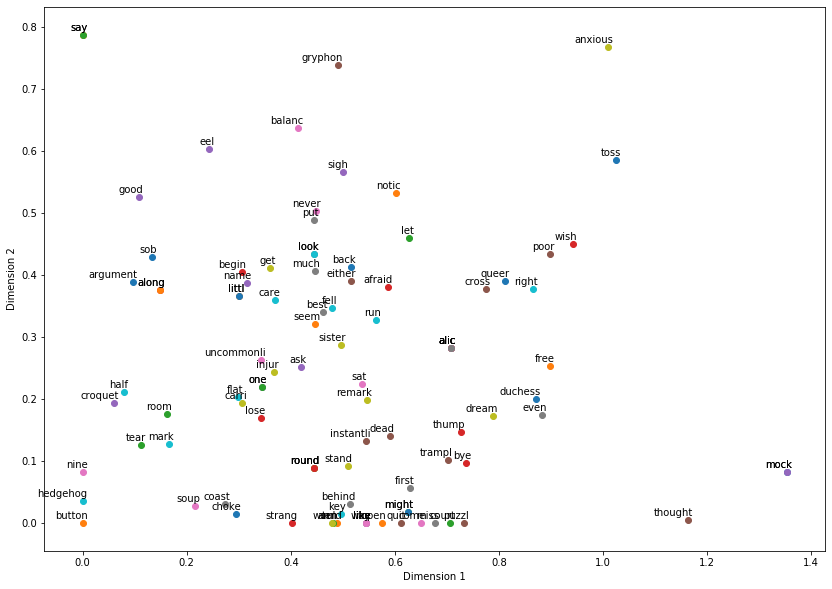

In [80]:
#in inches
plt.figure(figsize=(14, 10))  

for i, label in enumerate(labels):
    x = xvals[i]
    y = yvals[i]
    
    plt.scatter(x, y)
    plt.annotate(label,xy=(x, y),xytext=(5, 2),textcoords='offset points', ha='right',va='bottom')

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.show()